<a href="https://colab.research.google.com/github/FurqanBhat/ML-Colab-Notebooks/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.shape

(205, 26)

In [ ]:
# Eliminating columns with categorical variables
df = df[['wheelbase', 'enginesize', 'carlength', 'carwidth', 'carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',  'highwaympg', 'price']]
df.head()

,wheelbase,enginesize,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,130,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,130,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,152,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,109,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,136,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.dtypes

,0
wheelbase,float64
enginesize,int64
carlength,float64
carwidth,float64
carheight,float64
curbweight,int64
boreratio,float64
stroke,float64
compressionratio,float64
horsepower,int64


In [ ]:
df.describe()

,wheelbase,enginesize,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,126.907317,174.049268,65.907805,53.724878,2555.565854,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,41.642693,12.337289,2.145204,2.443522,520.680204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,61.000000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,97.000000,166.300000,64.100000,52.000000,2145.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,120.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,141.000000,183.100000,66.900000,55.500000,2935.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,326.000000,208.100000,72.300000,59.800000,4066.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
def plotter(column_list, target_col, df):
  len_col=len(column_list)
  color= ['b','g','r','c','m','y','k']
  fig, axes =plt.subplots(len_col, figsize=(6,6*len_col))
  for col, ax in zip(column_list, axes):
    ax.scatter(df[col], df[target_col], alpha=0.3, c=np.random.choice(color))
    ax.set_xlabel(col)
    ax.set_ylabel(target_col)


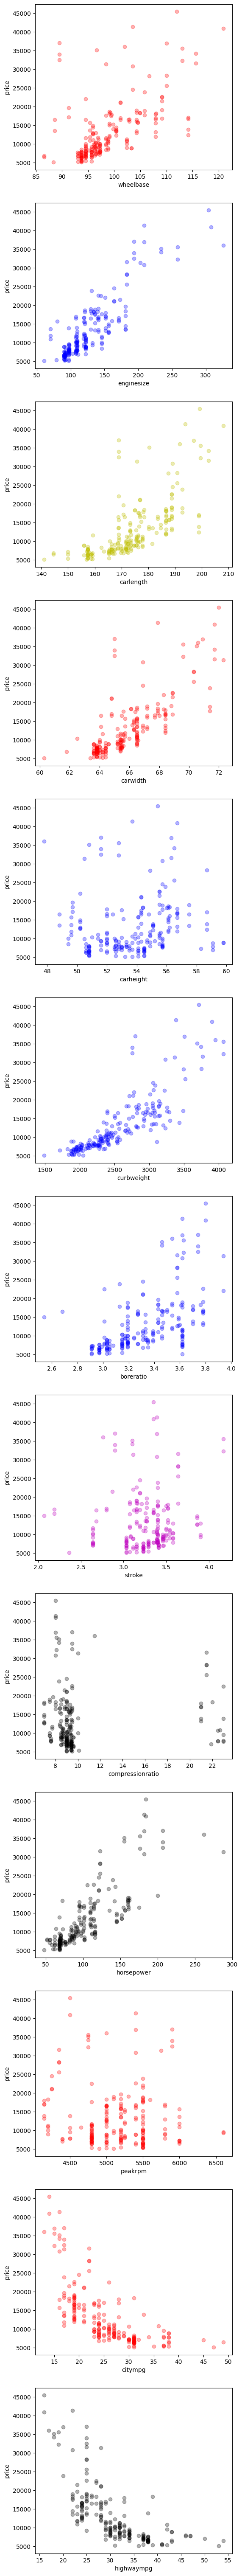

In [ ]:
cols_list=list(df.columns)
cols_list.remove('price')

target_col='price'
plotter(cols_list, target_col, df)


<Axes: title={'center': 'Correlation HeapMap'}>

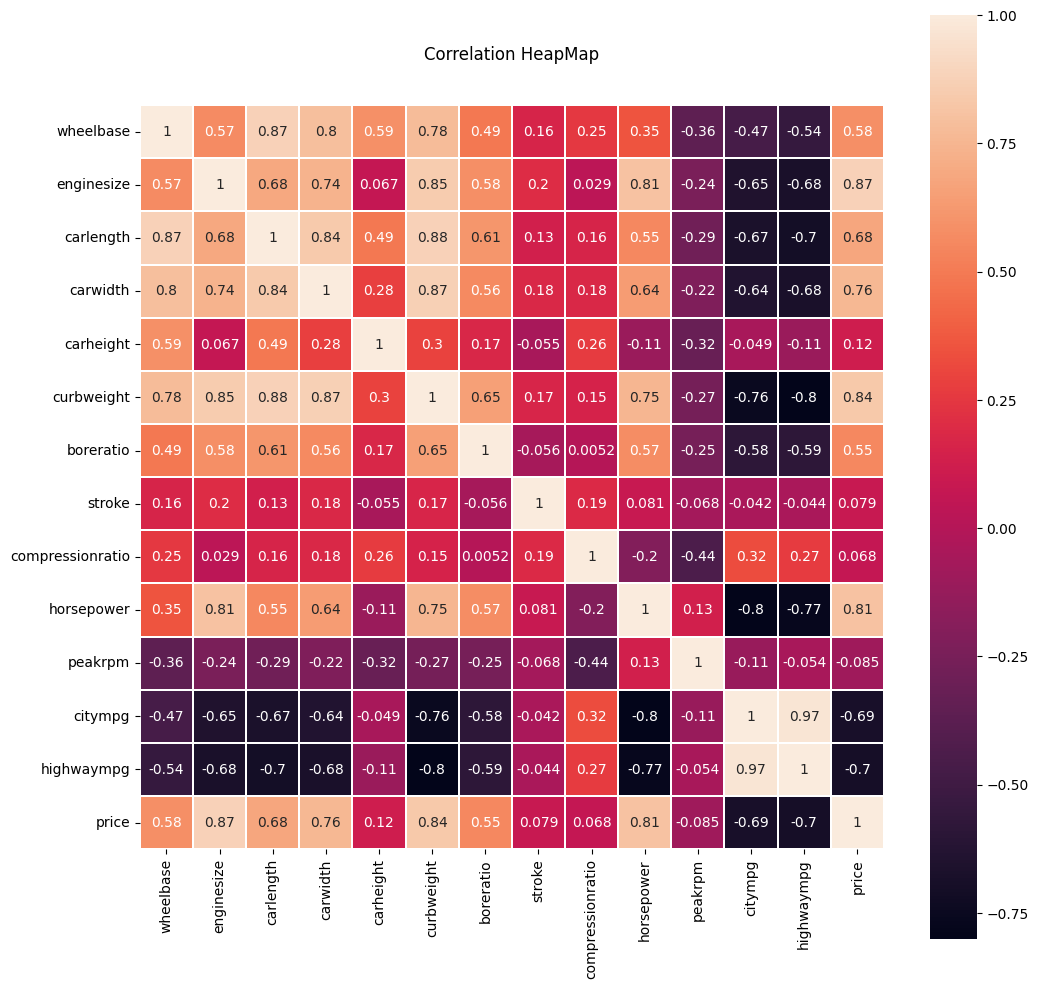

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Correlation HeapMap', y=1.05)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)

In [ ]:
df = df[['enginesize', 'curbweight','horsepower', 'carlength', 'carwidth', 'citympg', 'highwaympg', 'price']].astype('float64')
features=df[['enginesize', 'curbweight','horsepower', 'carlength', 'carwidth', 'citympg', 'highwaympg']]
target=df['price']
print('shape of the features DF- {}\nshape of the target series- {}'.format(features.shape, target.shape))

shape of the features DF- (205, 7)
shape of the target series- (205,)


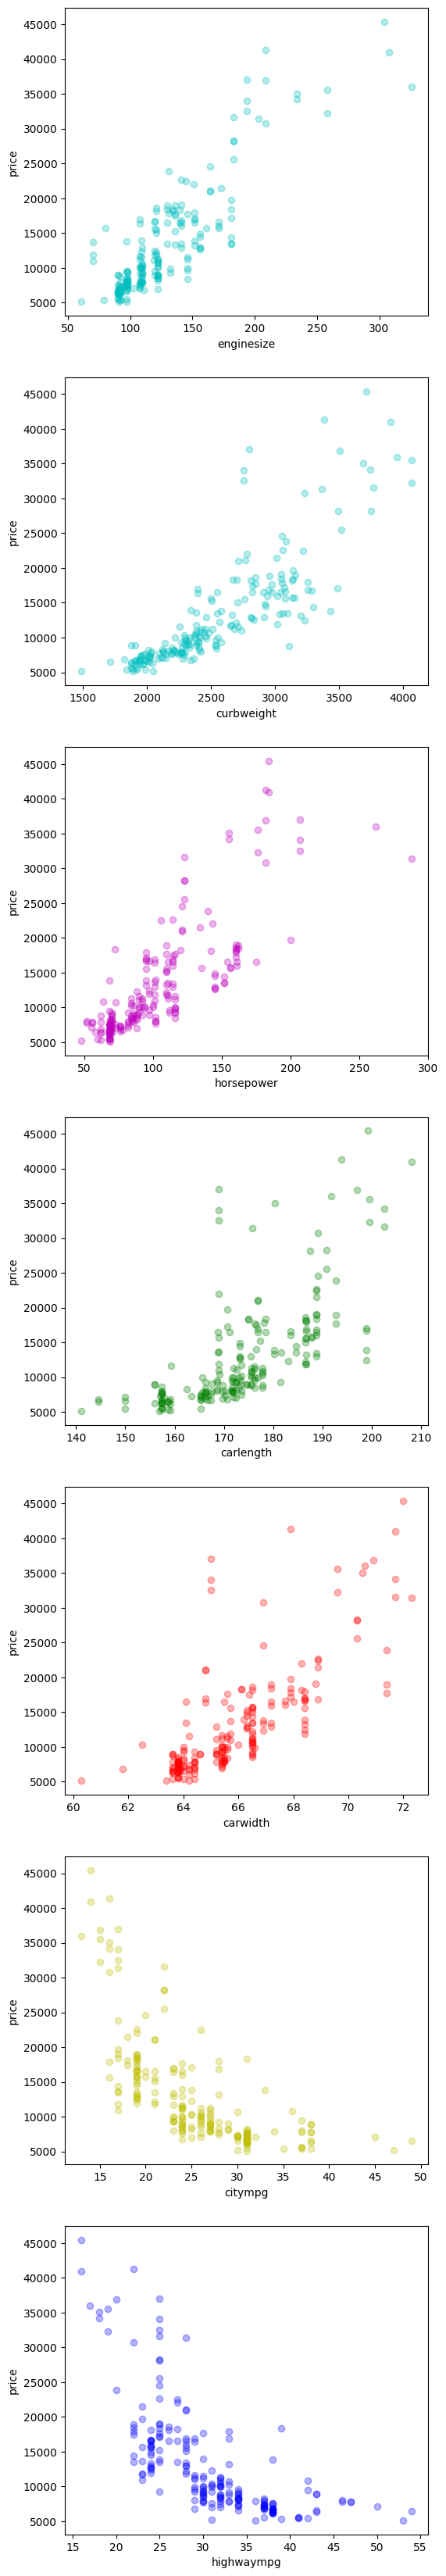

In [ ]:
cols=list(features.columns)
target_col='price'
plotter(cols,target_col,df)

In [ ]:
features_x2=features[['enginesize', 'curbweight', 'horsepower', 'carlength', 'carwidth']].to_numpy()
features_x2=torch.from_numpy(features_x2)
print(features_x2.size())

features_1byX2 = features[['citympg', 'highwaympg']].to_numpy() # converting DF to numpy array
features_1byX2 = torch.from_numpy(features_1byX2) # converting numpy array to a pytorch tensor
print(features_1byX2.size())

torch.Size([205, 5])
torch.Size([205, 2])


In [ ]:
features_x2=torch.cat((features_x2, features_x2*features_x2), dim=1)
features_x2.size()

torch.Size([205, 10])

In [ ]:
features_1byX2=1/features_1byX2
features_1byX2=torch.cat((features_1byX2, features_1byX2*features_1byX2), dim=1)
features_1byX2.size()

torch.Size([205, 4])

In [ ]:
poly_features=torch.cat((features_x2, features_1byX2), dim=1)
poly_features.size()

torch.Size([205, 14])

In [ ]:
def minMaxNormalizer(feature_tensor):
  total_cols=feature_tensor.size()[1]

  for i in range(total_cols):
    feature_col=feature_tensor[:,i]
    maximum=torch.max(feature_col)
    minimum=torch.min(feature_col)
    feature_tensor[:,i]=(feature_tensor[:,i]-minimum)/(maximum-minimum)

In [ ]:
poly_features

tensor([[1.3000e+02, 2.5480e+03, 1.1100e+02,  ..., 3.7037e-02, 2.2676e-03,
         1.3717e-03],
        [1.3000e+02, 2.5480e+03, 1.1100e+02,  ..., 3.7037e-02, 2.2676e-03,
         1.3717e-03],
        [1.5200e+02, 2.8230e+03, 1.5400e+02,  ..., 3.8462e-02, 2.7701e-03,
         1.4793e-03],
        ...,
        [1.7300e+02, 3.0120e+03, 1.3400e+02,  ..., 4.3478e-02, 3.0864e-03,
         1.8904e-03],
        [1.4500e+02, 3.2170e+03, 1.0600e+02,  ..., 3.7037e-02, 1.4793e-03,
         1.3717e-03],
        [1.4100e+02, 3.0620e+03, 1.1400e+02,  ..., 4.0000e-02, 2.7701e-03,
         1.6000e-03]], dtype=torch.float64)

In [ ]:
minMaxNormalizer(poly_features)
poly_features

tensor([[0.2604, 0.4112, 0.2625,  ..., 0.4211, 0.3365, 0.2887],
        [0.2604, 0.4112, 0.2625,  ..., 0.4211, 0.3365, 0.2887],
        [0.3434, 0.5178, 0.4417,  ..., 0.4534, 0.4279, 0.3189],
        ...,
        [0.4226, 0.5912, 0.3583,  ..., 0.5675, 0.4854, 0.4343],
        [0.3170, 0.6707, 0.2417,  ..., 0.4211, 0.1932, 0.2887],
        [0.3019, 0.6106, 0.2750,  ..., 0.4884, 0.4279, 0.3528]],
       dtype=torch.float64)

In [ ]:
weights=torch.rand(poly_features.size()[1], requires_grad=True)
weights

tensor([0.5038, 0.0447, 0.7937, 0.1486, 0.0321, 0.9021, 0.4114, 0.4016, 0.9674,
        0.5988, 0.0241, 0.4743, 0.9005, 0.6834], requires_grad=True)

In [ ]:
bias=torch.rand(1,requires_grad=True)
bias

tensor([0.7733], requires_grad=True)

In [ ]:
target=torch.from_numpy(target.to_numpy())
target

tensor([13495.0000, 16500.0000, 16500.0000, 13950.0000, 17450.0000, 15250.0000,
        17710.0000, 18920.0000, 23875.0000, 17859.1670, 16430.0000, 16925.0000,
        20970.0000, 21105.0000, 24565.0000, 30760.0000, 41315.0000, 36880.0000,
         5151.0000,  6295.0000,  6575.0000,  5572.0000,  6377.0000,  7957.0000,
         6229.0000,  6692.0000,  7609.0000,  8558.0000,  8921.0000, 12964.0000,
         6479.0000,  6855.0000,  5399.0000,  6529.0000,  7129.0000,  7295.0000,
         7295.0000,  7895.0000,  9095.0000,  8845.0000, 10295.0000, 12945.0000,
        10345.0000,  6785.0000,  8916.5000,  8916.5000, 11048.0000, 32250.0000,
        35550.0000, 36000.0000,  5195.0000,  6095.0000,  6795.0000,  6695.0000,
         7395.0000, 10945.0000, 11845.0000, 13645.0000, 15645.0000,  8845.0000,
         8495.0000, 10595.0000, 10245.0000, 10795.0000, 11245.0000, 18280.0000,
        18344.0000, 25552.0000, 28248.0000, 28176.0000, 31600.0000, 34184.0000,
        35056.0000, 40960.0000, 45400.00

In [ ]:
def poly_regression(features,weights,bias):
  y_hat=(weights.float() @ features.t().float()+bias.float())
  return y_hat

In [ ]:
predictions=poly_regression(poly_features, weights, bias)
predictions.size()

torch.Size([205])

In [ ]:
target.size()

torch.Size([205])

In [ ]:
def mean_square_error(y, y_hat):
  return torch.mean((y-y_hat)**2)

In [ ]:
print(f"Total MSE error: {mean_square_error(target, predictions)}")

Total MSE error: 239692563.05807912


In [ ]:
def stoc_grad_des(learning_rate, epochs, target, features, weights, bias):
  MSE_list=torch.empty(0)
  for i in range(epochs):
    predictions=poly_regression(features, weights, bias)
    MSE=mean_square_error(target, predictions)
    MSE.backward()
    with torch.no_grad():
      weights -= learning_rate*weights.grad
      bias -= learning_rate*bias.grad
      weights.grad.zero_()
      bias.grad.zero_()
    MSE_list=torch.cat((MSE_list,MSE.reshape(1).float()), dim=0)

  return {'weights': weights, 'bias': bias, 'MSE_list': MSE_list}

In [ ]:
optimizer=stoc_grad_des(0.2,1000, target, poly_features, weights, bias)

In [ ]:
optimizer['weights']

tensor([ 9748.0049,  2225.1863,  3983.1948, -1505.5476,  2574.5286, 10280.7373,
         6157.5278,  5071.2861,   528.5640,  3898.4392,  1234.7297, -3492.1213,
         6670.1592,  1314.3900], requires_grad=True)

In [ ]:
optimizer['bias']

tensor([1155.4386], requires_grad=True)

In [ ]:
optimizer['MSE_list'].min()

tensor(10494453., grad_fn=<MinBackward1>)

In [ ]:
def r2_score(target, prediction):
  r2 = 1- torch.sum((target-prediction)**2) / torch.sum((target-target.float().mean())**2)
  return r2

In [ ]:
final_predictions=poly_regression(poly_features, optimizer['weights'], optimizer['bias'])

In [ ]:
r2_score(target,predictions)

tensor(-2.7741, dtype=torch.float64, grad_fn=<RsubBackward1>)

In [ ]:
r2_score(target, final_predictions)

tensor(0.8348, dtype=torch.float64, grad_fn=<RsubBackward1>)

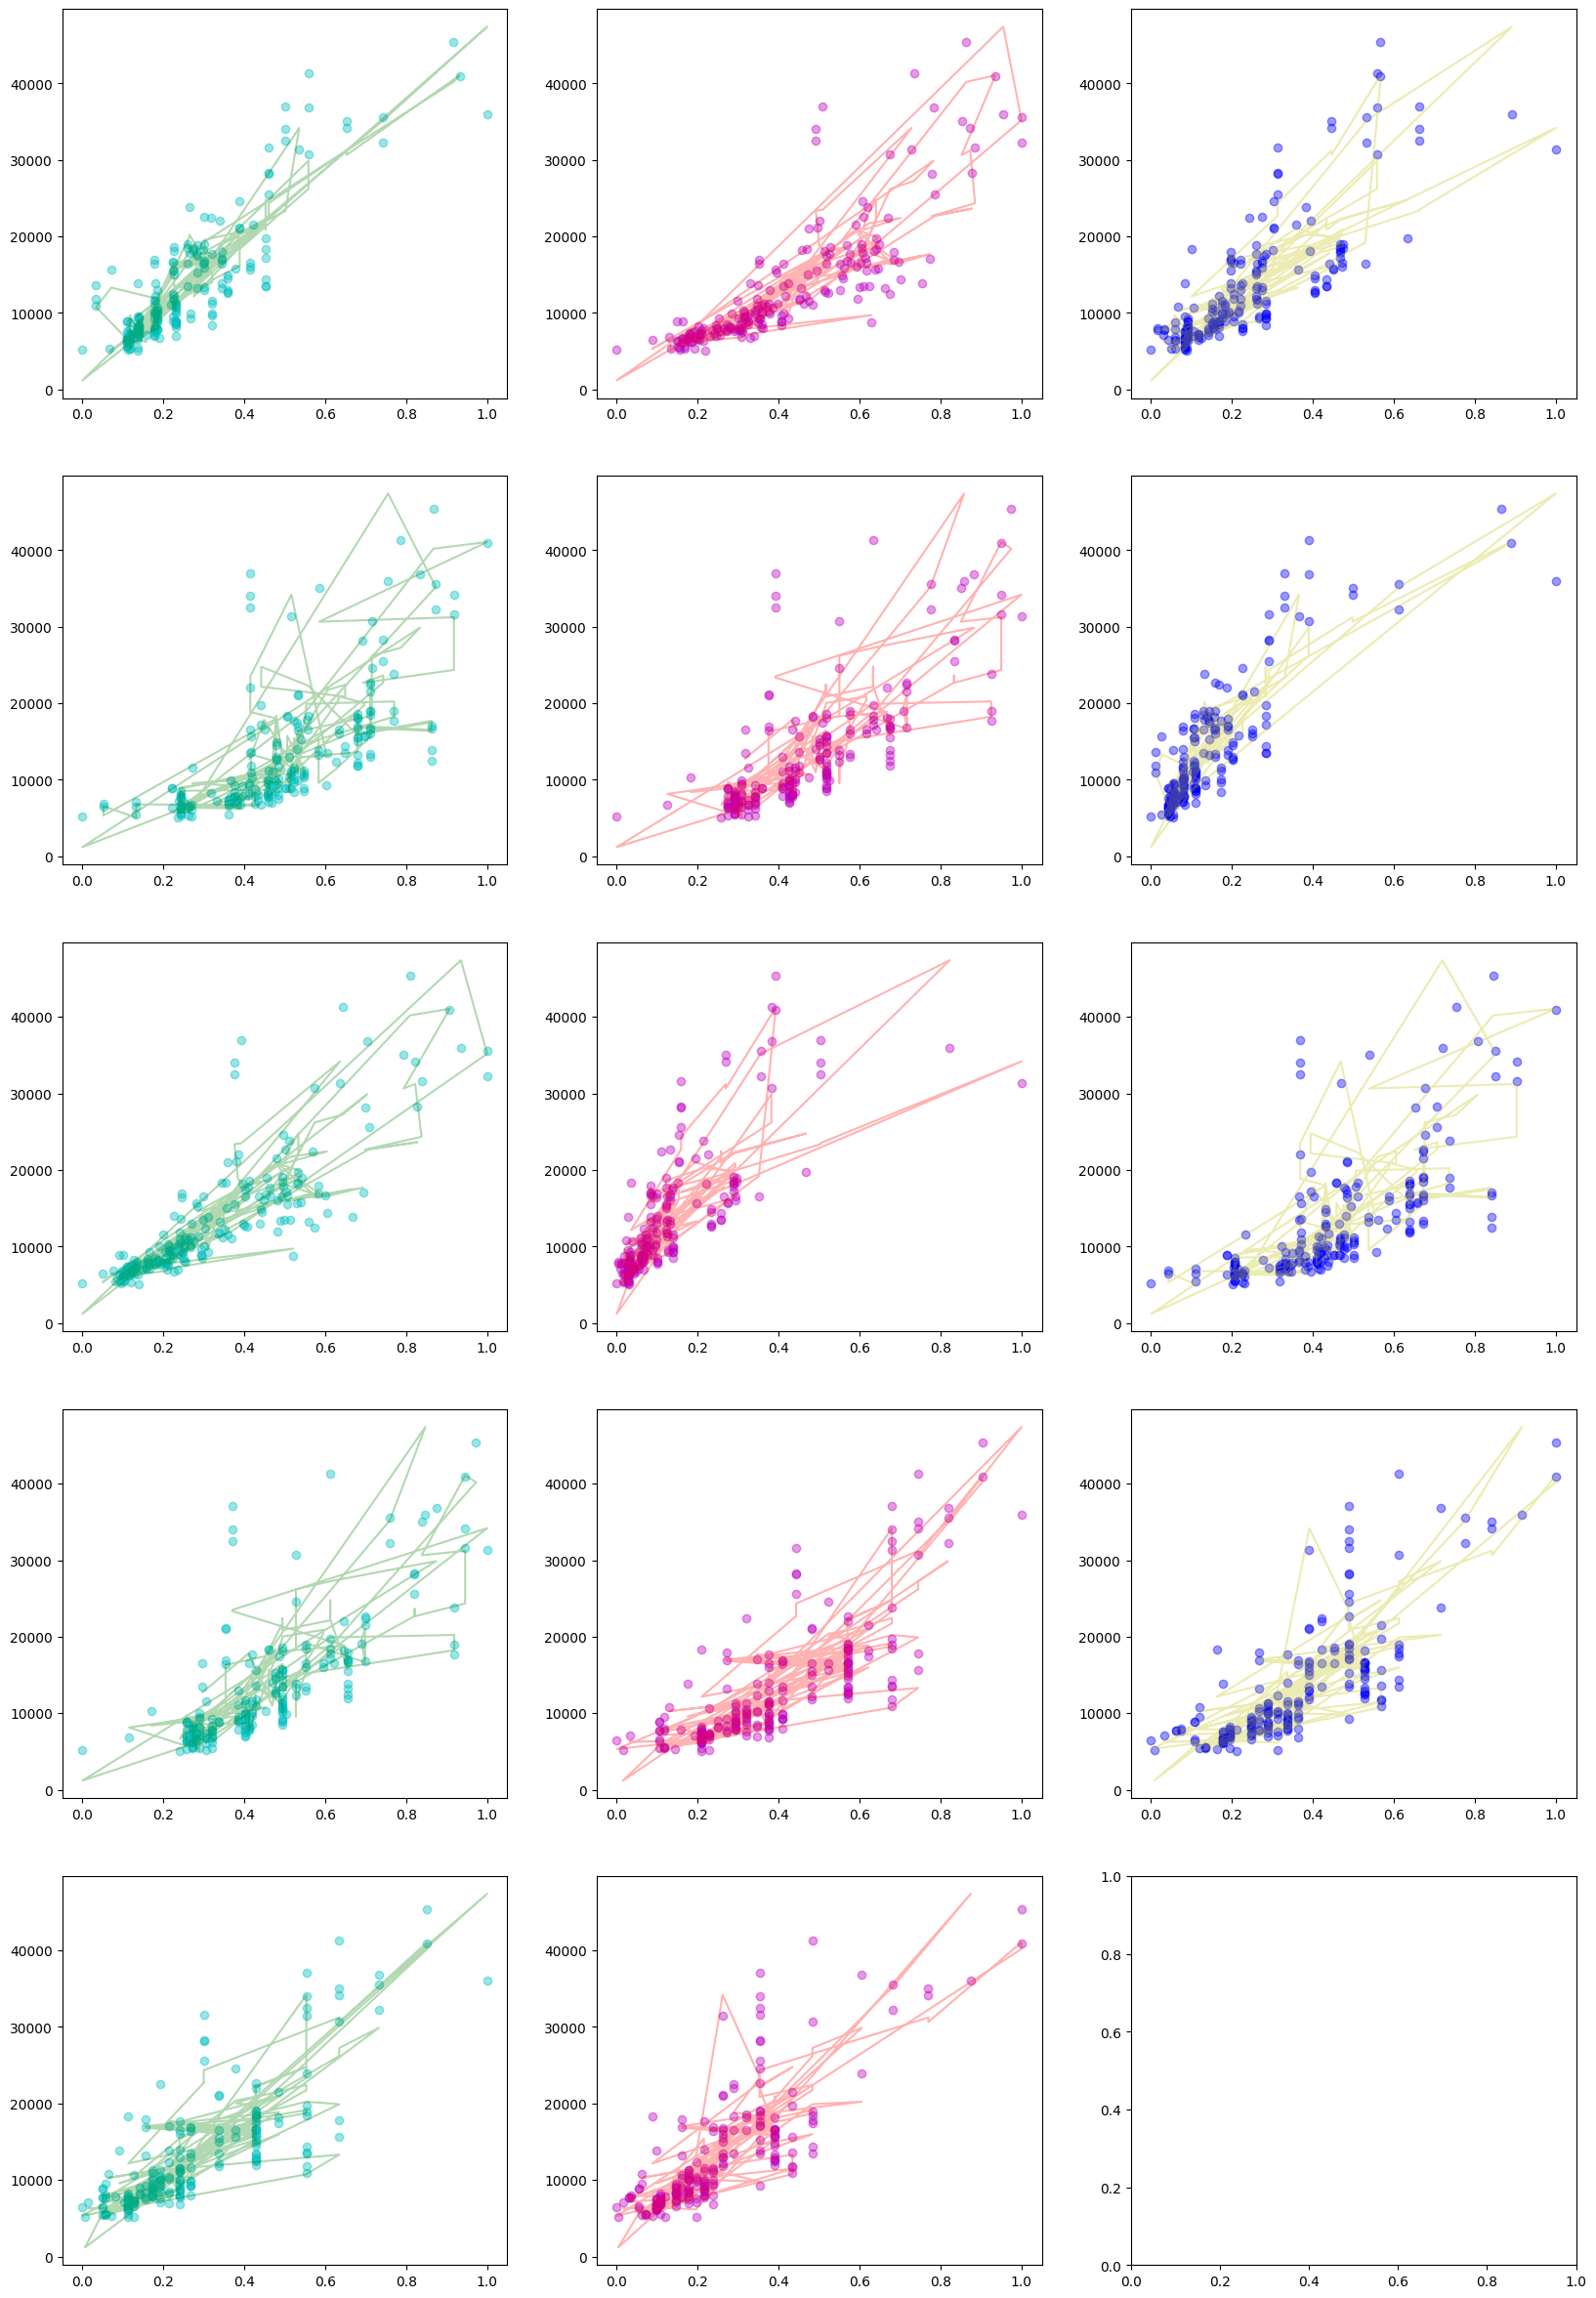

In [ ]:
final_prediction = final_predictions.detach().numpy() #numpy array of final predictions
poly_feature = poly_features.numpy() #numpy array of polynomially transformed features
targets = target.numpy() #numpy array of actual target values
weights = optimizer['weights'].detach().numpy() #updated weights obtained by optimizer function
bias = optimizer['bias'].detach().numpy() #updated bias obtained by optimizer function

fig, a =  plt.subplots(5,3, figsize = (20, 30))

# plotting for 1st feature
a[0,0].scatter(poly_feature[:,0], target, color = 'c', alpha = 0.4)
a[0,0].plot(poly_feature[:,0], final_prediction, color = 'g', alpha = 0.3)

# 2nd feature
a[0,1].scatter(poly_feature[:,1], target, color = 'm', alpha = 0.4)
a[0,1].plot(poly_feature[:,1], final_prediction, color = 'r', alpha = 0.3)

# 3rd feature
a[0,2].scatter(poly_feature[:,2], target, color = 'b', alpha = 0.4)
a[0,2].plot(poly_feature[:,2], final_prediction, color = 'y', alpha = 0.3)

# 4th feature
a[1,0].scatter(poly_feature[:,3], target, color = 'c', alpha = 0.4)
a[1,0].plot(poly_feature[:,3], final_prediction, color = 'g', alpha = 0.3)

# 5th feature
a[1,1].scatter(poly_feature[:,4], target, color = 'm', alpha = 0.4)
a[1,1].plot(poly_feature[:,4], final_prediction, color = 'r', alpha = 0.3)

# 6th feature
a[1,2].scatter(poly_feature[:,5], target, color = 'b', alpha = 0.4)
a[1,2].plot(poly_feature[:,5], final_prediction, color = 'y', alpha = 0.3)

# 7th feature
a[2,0].scatter(poly_feature[:,6], target, color = 'c', alpha = 0.4)
a[2,0].plot(poly_feature[:,6], final_prediction, color = 'g', alpha = 0.3)

# 8th feature
a[2,1].scatter(poly_feature[:,7], target, color = 'm', alpha = 0.4)
a[2,1].plot(poly_feature[:,7], final_prediction, color = 'r', alpha = 0.3)

# 9th feature
a[2,2].scatter(poly_feature[:,8], target, color = 'b', alpha = 0.4)
a[2,2].plot(poly_feature[:,8], final_prediction, color = 'y', alpha = 0.3)

# 10th
a[3,0].scatter(poly_feature[:,9], target, color = 'c', alpha = 0.4)
a[3,0].plot(poly_feature[:,9], final_prediction, color = 'g', alpha = 0.3)

# 11th
a[3,1].scatter(poly_feature[:,10], target, color = 'm', alpha = 0.4)
a[3,1].plot(poly_feature[:,10], final_prediction, color = 'r', alpha = 0.3)

# 12th
a[3,2].scatter(poly_feature[:,11], target, color = 'b', alpha = 0.4)
a[3,2].plot(poly_feature[:,11], final_prediction, color = 'y', alpha = 0.3)

# 13th
a[4,0].scatter(poly_feature[:,12], target, color = 'c', alpha = 0.4)
a[4,0].plot(poly_feature[:,12], final_prediction, color = 'g', alpha = 0.3)

# 14th
a[4,1].scatter(poly_feature[:,13], target, color = 'm', alpha = 0.4)
a[4,1].plot(poly_feature[:,13], final_prediction, color = 'r', alpha = 0.3)